In [0]:
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
from IPython.display import display 


# Pretty display for notebooks
%matplotlib inline
pd.set_option('display.max_colwidth', -1)

dataset = pd.read_csv("dataset_encoded_under_sampled.csv.gz", compression='gzip')
dataset = dataset.drop(['Unnamed: 0'], axis = 1)
display(dataset.head(n = 5))

labels = dataset[['RIESGO_VIDA']]
features = dataset.drop(['RIESGO_VIDA', 'PQR_ESTADO'], axis = 1)

,AFEC_EDADR,AFEC_EDUC,AFEC_GENERO,AFEC_GETNICO,AFEC_PARENTESCO,AFEC_POBESPECIAL,AFEC_REGAFILIACION,AFEC_TIPOPER,ALTO_COSTO,CIE_10,...,PQR_CLASE_SNS,PQR_ESTADO,PQR_TIPOATENCION,PQR_TIPOPETICION,TRIM,AFEC_LOCATION,ENT_LOCATION,PET_LOCATION,COMPLETE_MOTIVE,RIESGO_VIDA
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.125322,...,0.0,0.000000,1.000000,0.000000,0.205221,0.044997,0.001214,0.121125,0.001303,0
1,0.487840,0.892235,1.000000,0.445166,0.290884,0.304503,0.661319,1.0,0.0,0.125322,...,1.0,0.091348,1.000000,0.658277,0.205221,0.342978,0.336340,0.296725,0.209656,0
2,0.909893,0.000000,1.000000,0.000000,0.459473,0.000000,0.661319,1.0,0.0,0.125322,...,1.0,0.091348,0.512068,0.658277,0.150914,0.255862,0.401975,0.178734,0.050243,0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.125322,...,0.0,0.000000,1.000000,0.000000,0.000000,0.044997,0.343342,0.164880,0.000486,0
4,0.394497,0.530003,0.865504,0.445166,0.478849,0.735371,1.000000,1.0,0.0,0.125322,...,1.0,0.091348,0.512068,0.658277,0.150914,0.044997,0.274045,0.159041,0.170291,0


## Shuffle and Split Data

In [0]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'labels' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    labels, 
                                                    test_size = 0.20, 
                                                    random_state = 10)

# Show the results of the split
print "features_final set has {} samples.".format(features.shape[0])
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

features_final set has 577622 samples.
Training set has 462097 samples.
Testing set has 115525 samples.


### Creating a Training and Predicting Pipeline

In [0]:
'''
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case
'''

tp = float(np.sum(labels['RIESGO_VIDA']))
fp = float(labels['RIESGO_VIDA'].count() - tp)
tn = 0
fn = 0

# TODO: Calculate accuracy, precision and recall
accuracy = (tp + tn)/labels['RIESGO_VIDA'].count()
recall = tp / (tp + fn)
precision = tp / (tp + fp)
print(accuracy)
# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
# HINT: The formula above can be written as (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)
beta = 2
fscore = (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)

# Print the results 
print "Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore)

0.5
Naive Predictor: [Accuracy score: 0.5000, F-score: 0.8333]


In [0]:
from sklearn.metrics import fbeta_score

def train_predict(learner, learner_index, size_index, sample_size, X_train, y_train, X_test, y_test, dfResults): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''    
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    train_time = end - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    pred_time = end - start
               
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    b=2
    f_train = fbeta_score(y_train[:300], predictions_train, b)
        
    # TODO: Compute F-score on the test set which is y_test
    f_test =  fbeta_score(y_test, predictions_test, b)
           
    # Success
    print("%s trained on %d samples." % (learner.__class__.__name__, sample_size))
       
    dfResults = dfResults.append({'learner': learner.__class__.__name__, 'learner_index': learner_index, 'size_index': size_index, 'train_time': train_time, 'pred_time': pred_time, 'f_test': f_test, 'f_train':f_train}, ignore_index=True)  
    # Return the results
    return dfResults

In [0]:
import visuals as vs
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
# Initialize the three models
clf_A = AdaBoostClassifier(random_state = 300)
clf_B = RandomForestClassifier(random_state = 300)
clf_C = SGDClassifier(random_state = 300)

samples_100 = len(y_train)
samples_10 = int(samples_100*0.1)
samples_1 = int(samples_10*0.1)

dfResults = pd.DataFrame(columns=['learner', 'learner_index', 'size_index', 'train_time', 'pred_time', 'f_test', 'f_train'])

# Collect results on the learners
for k, clf in enumerate([clf_A, clf_B, clf_C]):
    clf_name = clf.__class__.__name__    
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        dfResults = \
        train_predict(clf, k, i, samples, X_train, y_train, X_test, y_test, dfResults)


/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier trained on 4620 samples.
AdaBoostClassifier trained on 46209 samples.
AdaBoostClassifier trained on 462097 samples.


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


RandomForestClassifier trained on 4620 samples.
RandomForestClassifier trained on 46209 samples.
RandomForestClassifier trained on 462097 samples.
SGDClassifier trained on 4620 samples.
SGDClassifier trained on 46209 samples.


/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier trained on 462097 samples.


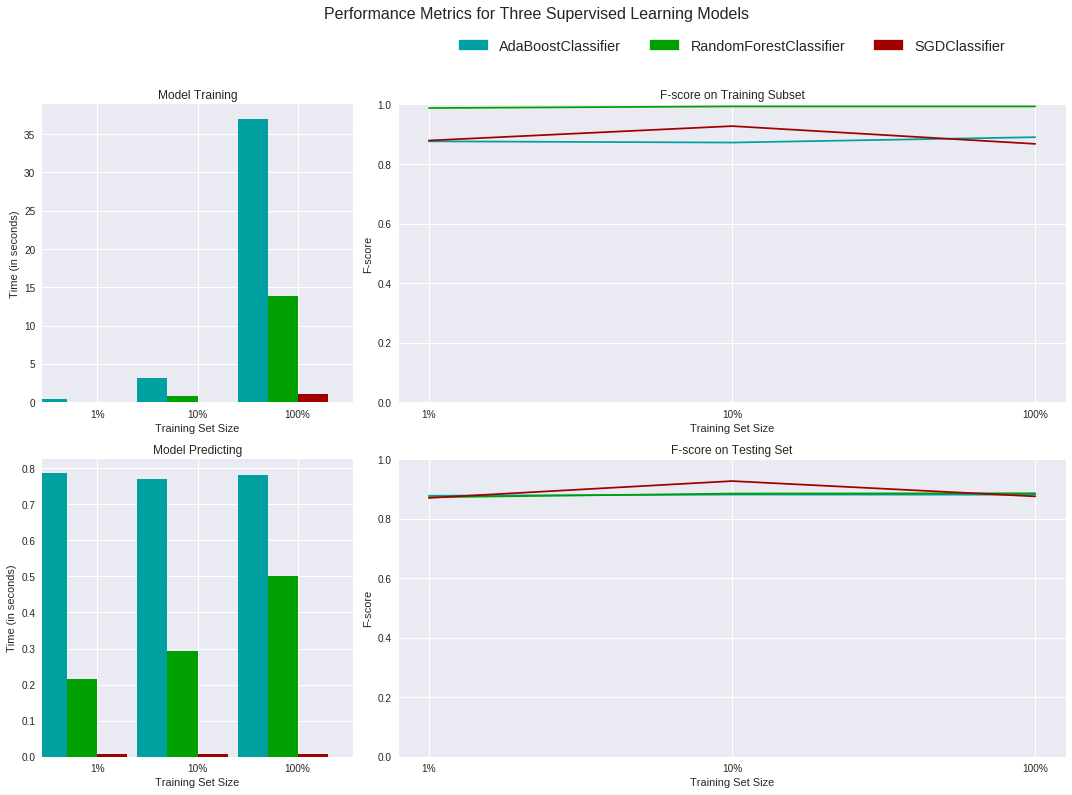

In [0]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

plt.figure(figsize = (15,10))

axTraining = plt.subplot2grid((2, 3), (0, 0), colspan=1)
axFscoreTraining = plt.subplot2grid((2, 3), (0, 1), colspan=2)
axPrediction = plt.subplot2grid((2, 3), (1, 0), colspan=1)
axFscoreTest = plt.subplot2grid((2, 3), (1, 1), colspan=2)

bar_width = 0.3
colors = {
      'SGDClassifier': '#A00000',
      'AdaBoostClassifier': '#00A0A0',
      'RandomForestClassifier': '#00A000'
}


def plotTimes(df, ax, time_field):
  for iLearner, row in df.iterrows():    
    ax.bar(row['size_index'] + row['learner_index']*bar_width, row[time_field], width = bar_width, color = colors[row['learner']])
    ax.set_xticks([0.45, 1.45, 2.45])
    ax.set_xticklabels(["1%", "10%", "100%"])
    ax.set_xlabel("Training Set Size")
    ax.set_xlim((-0.1, 3.0))
    
def plotEval(df, ax, eval_field):  
  learners = df['learner'].drop_duplicates().values.tolist()
  for learner in learners:
    dfLearner = df.loc[df['learner'] == learner].sort_values(by=['size_index'])
    size_index = dfLearner['size_index'].values.tolist()
    values = dfLearner[eval_field].values.tolist()
    
    ax.plot(size_index, values, color = colors[learner])
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(["1%", "10%", "100%"])
    ax.set_xlabel("Training Set Size")

plotTimes(dfResults, axTraining, 'train_time')
plotTimes(dfResults, axPrediction, 'pred_time')

plotEval(dfResults, axFscoreTraining, 'f_train')
plotEval(dfResults, axFscoreTest, 'f_test')

# Add unique y-labels
axTraining.set_ylabel("Time (in seconds)")
axFscoreTraining.set_ylabel("F-score")
axPrediction.set_ylabel("Time (in seconds)")
axFscoreTest.set_ylabel("F-score")
    
axTraining.set_title("Model Training")
axFscoreTraining.set_title("F-score on Training Subset")
axPrediction.set_title("Model Predicting")
axFscoreTest.set_title("F-score on Testing Set")

axFscoreTraining.set_ylim((0, 1))
axFscoreTest.set_ylim((0, 1))

# Create patches for the legend
learners = dfResults['learner'].drop_duplicates().values.tolist()
patches = []
for i, learner in enumerate(learners):
    patches.append(mpatches.Patch(color = colors[learner], label = learner))
plt.legend(handles = patches, bbox_to_anchor = (0.5, 2.43), loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 'x-large')

# Aesthetics
plt.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 16, y = 1.10)
plt.tight_layout()
plt.show()

In [0]:
display( dfResults.loc[dfResults['size_index'] == 2].sort_values(by=['f_test'], ascending = False)[['learner', 'f_test']])

,learner,f_test
5,RandomForestClassifier,0.884855
2,AdaBoostClassifier,0.880219
8,SGDClassifier,0.874502


## Tuning Models

In [0]:
def tuneClassifier(clf, parameters):
  
  # TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
  from sklearn.metrics import make_scorer
  from sklearn.grid_search import GridSearchCV
  from sklearn.ensemble import ExtraTreesClassifier

  c, r = y_train.shape
  labels = y_train.values.reshape(c,)
  
  # TODO: Make an fbeta_score scoring object using make_scorer()
  scorer = make_scorer(fbeta_score, beta=2)
  # TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
  grid_obj = GridSearchCV(clf, param_grid=parameters,  scoring=scorer)
  # TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
  grid_fit = grid_obj.fit(X_train, labels)
  # Get the estimator
  best_clf = grid_fit.best_estimator_
  # Make predictions using the unoptimized and model
  predictions = (clf.fit(X_train, labels)).predict(X_test)
  best_predictions = best_clf.predict(X_test)
  # Report the before-and-afterscores
  print "Unoptimized model\n------"
  print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 2))
  print "\nOptimized Model\n------"
  print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 2))
  return best_clf

# Tuning RandomForestClassifier

In [0]:
from sklearn.externals import joblib

rfClassifier = RandomForestClassifier(random_state = 20)

rfParameters = {    
  'criterion':['gini', 'entropy'],
  'max_depth':[5, 10],
  'max_features':['auto', 'sqrt', 'log2', None],
  'class_weight': ['balanced', 'balanced_subsample'], 
}

rfClassifier = tuneClassifier(rfClassifier, rfParameters)

joblib.dump(rfClassifier, 'rfClassifier.joblib') 

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Unoptimized model
------
F-score on testing data: 0.8863

Optimized Model
------
Final F-score on the testing data: 0.9172


['rfClassifier.joblib']

# Tuning SGDClassifier

In [0]:
sdgClassifier = SGDClassifier(random_state = 20)

sdgParameters = {
  'eta0':[0.01],
  'loss':['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
  'penalty':['none', 'l2', 'l1', 'elasticnet'],
  'learning_rate':['constant', 'optimal', 'invscaling'],
  'class_weight' :['balanced']
  #'max_features':['auto', 'sqrt', 'log2', None],
}

sdgClassifier = tuneClassifier(sdgClassifier, sdgParameters)

joblib.dump(rfClassifier, 'sdgClassifier.joblib') 

Unoptimized model
------
F-score on testing data: 0.8793

Optimized Model
------
Final F-score on the testing data: 0.9010


['sdgClassifier.joblib']

## MaxAbsScaler

In [0]:
from sklearn.preprocessing import MaxAbsScaler
transformer = MaxAbsScaler().fit(features)

X_Scaled = transformer.transform(features)

XScaled_train, XScaled_test, yScaled_train, yScaled_test = train_test_split(X_Scaled, 
                                                    labels, 
                                                    test_size = 0.20, 
                                                    random_state = 10)

# Show the results of the split
print "X_Scaled.shape {}.".format(X_Scaled.shape)
print "XScaled_train.shape {}.".format(XScaled_train.shape)
print "XScaled_test.shape {}.".format(XScaled_test.shape)

from sklearn.base import clone
sdgClassifier_Scaled = (clone(sdgClassifier)).fit(XScaled_train, yScaled_train)
predictions_testScaled = sdgClassifier_Scaled.predict(XScaled_test)

f_testScaled =  fbeta_score(yScaled_test, predictions_testScaled, 2)
print(f_testScaled)

X_Scaled.shape (577622, 31).
XScaled_train.shape (462097, 31).
XScaled_test.shape (115525, 31).
0.9010138468342805


## RobustScaler

In [0]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(features)

X_RScaled = transformer.transform(features)

XRScaled_train, XRScaled_test, yRScaled_train, yRScaled_test = train_test_split(X_RScaled, 
                                                    labels, 
                                                    test_size = 0.20, 
                                                    random_state = 10)

# Show the results of the split
print "X_Scaled.shape {}.".format(X_RScaled.shape)
print "XRScaled_train.shape {}.".format(XRScaled_train.shape)
print "XRScaled_test.shape {}.".format(XRScaled_test.shape)

from sklearn.base import clone
sdgClassifier_RScaled = (clone(sdgClassifier)).fit(XRScaled_train, yRScaled_train)
predictions_testRScaled = sdgClassifier_RScaled.predict(XRScaled_test)

f_testRScaled =  fbeta_score(yRScaled_test, predictions_testRScaled, 2)
print(f_testRScaled)

X_Scaled.shape (577622, 31).
XRScaled_train.shape (462097, 31).
XRScaled_test.shape (115525, 31).
0.8773984808900116


## QuantileTransformer

In [0]:
from sklearn.preprocessing import QuantileTransformer
transformerQT = QuantileTransformer().fit(features)

X_QT = transformerQT.transform(features)

XQT_train, XQT_test, yQT_train, yQT_test = train_test_split(X_QT, 
                                                    labels, 
                                                    test_size = 0.20, 
                                                    random_state = 10)

# Show the results of the split
print "X_Scaled.shape {}.".format(X_QT.shape)
print "XQT_train.shape {}.".format(XQT_train.shape)
print "XQT_test.shape {}.".format(XQT_test.shape)

from sklearn.base import clone
sdgClassifier_QT = (clone(sdgClassifier)).fit(XQT_train, yQT_train)
predictions_testQT = sdgClassifier_QT.predict(XQT_test)

f_testQT =  fbeta_score(yQT_test, predictions_testQT, 2)
print(f_testQT)

X_Scaled.shape (577622, 31).
XQT_train.shape (462097, 31).
XQT_test.shape (115525, 31).
0.9247195017511354
